# Guía 2

**Importamos librería para cálculo simbólico**

In [1]:
import sympy as sy
sy.init_printing()

In [2]:
from IPython.display import Math, display
#import matplotlib.pyplot as plt
#from sympy.plotting import plot
from matplotlib import style
#style.use('fivethirtyeight')
style.use('ggplot')
%matplotlib inline

In [3]:
t = sy.symbols('t', real=True, positive=True)

In [4]:
im, T = sy.symbols('I_m T')

## Ejercicio 1

### c)

In [5]:
i1_ej1c = 4/T * im * t - im

i2_ej1c = -4/T * im * t + 3 * im

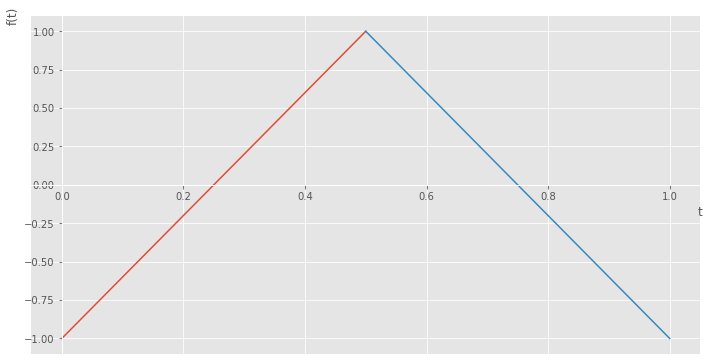

In [6]:
p1 = sy.plot(i1_ej1c.subs({im: 1, T: 1}), (t, 0, 0.5), show=False, size=(10,5))
p2 = sy.plot(i2_ej1c.subs({im: 1, T: 1}), (t, 0.5, 1), show=False)
p1.append(p2[0])
p1.show()

### $I_{med}$

In [7]:
#Imed
1/T * (sy.integrate(i1_ej1c, (t, 0, T/2)) + sy.integrate(i2_ej1c, (t, T/2, T)))

### $I_{|med|}$

In [8]:
i1_ej1c = -4/T * im * t + im

i2_ej1c = 4/T * im * t - im

In [9]:
#I|med|
2/T * (sy.integrate(i1_ej1c, (t, 0, T/4)) + sy.integrate(i2_ej1c, (t, T/4, T/2)))

### $I_{ef}$

In [10]:
i1_ej1c = 4/T * im * t - im

i2_ej1c = -4/T * im * t + 3 * im

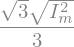

In [11]:
#Ief
sy.sqrt(1/T * (sy.integrate(i1_ej1c ** 2, (t, 0, T/2)) + sy.integrate(i2_ej1c ** 2, (t, T/2, T))))


#### e)

In [12]:
im, T, Ta = sy.symbols('I_m T T_a')

### $I_{med}$

In [13]:
i1_ej1e = im

i2_ej1e = 0

In [14]:
#sy.Piecewise((im, 0 < t < Ta), (0, Ta < t < T))

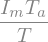

In [15]:
#Imed
1/T * (sy.integrate(i1_ej1e, (t, 0, Ta)) + sy.integrate(i2_ej1e, (t, Ta, T)))

### $I_{ef}$

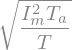

In [16]:
#Ief
sy.sqrt(1/T * (sy.integrate(i1_ej1e ** 2, (t, 0, Ta)) + sy.integrate(i2_ej1e ** 2, (t, Ta, T))))

## Ejercicio 2

## $i(t)$

In [17]:
i1_ej2 = -4/T * im * t + im

i2_ej2 = 4/T * im * t - 3 * im

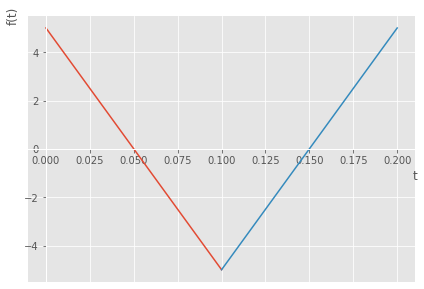

In [18]:
p1 = sy.plot(i1_ej2.subs({im: 5, T: 0.2}), (t, 0, 0.1), show=False)
p2 = sy.plot(i2_ej2.subs({im: 5, T: 0.2}), (t, 0.1, 0.2), show=False)
p1.append(p2[0])
p1.show()

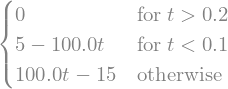

In [19]:
i_ej2 = sy.Piecewise((0, t < 0), (0, t > 2/10), (i1_ej2.subs({im: 5, T: 2/10}), t < 1/10), (i2_ej2.subs({im: 5, T: 2/10}), t >= 1/10))
i_ej2

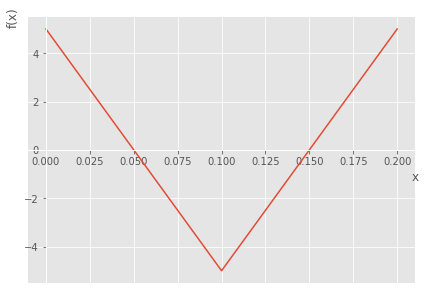

In [20]:
sy.plot((i_ej2, (t, 0, 0.2)))

## $I_{ef}$

In [21]:
#Ief
ief_ej2 = sy.sqrt(1/0.2 * sy.integrate(i_ej2 ** 2, (t, 0, 0.2)))
ief_ej2

In [22]:
sy.sqrt(1/0.2 * (sy.integrate(i1_ej2.subs({im: 5, T: 0.2}) ** 2, (t, 0, 0.1)) + sy.integrate(i2_ej2.subs({im: 5, T: 0.2}) ** 2, (t, 0.1, 0.2))))

### Potencia disipada 
$P={i_{ef}}^2 \cdot R$

In [23]:
_ ** 2 * 80

## Ejercicio 4

In [24]:
i1_ej4 = -2/T * im * t + im

i2_ej4 = 2/T * im * t - im

In [25]:
vals = {
    im: 5,
    T: 10
}

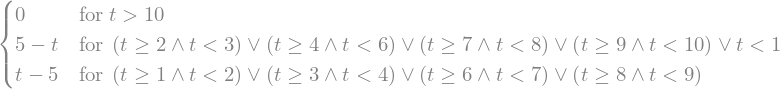

In [26]:
i_ej4 = sy.Piecewise((0, t < 0), 
                     (0, t > 10), 
                     (i1_ej4.subs(vals), (((t >= 0) & (t < 1)) | ((t >= 2) & (t < 3)) | ((t >= 4) & (t < 6)) | ((t >= 7) & (t < 8)) | ((t >= 9) & (t < 10)))),
                     (i2_ej4.subs(vals), (((t >= 1) & (t < 2)) | ((t >= 3) & (t < 4)) | ((t >= 6) & (t < 7)) | ((t >= 8) & (t < 9))))
                     )
i_ej4

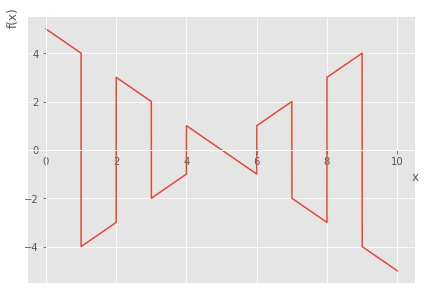

In [27]:
sy.plot((i_ej4, (t, 0, 10)))

In [28]:
#sy.integrate(i_ej4, (t, 0, 10))
#sy.integrate(i_ej4)

i1_ej4v = i1_ej4.subs(vals)
i2_ej4v = i2_ej4.subs(vals)

sy.sqrt(1/10 * (
    sy.integrate(i1_ej4v ** 2, (t, 0, 1)) +
    sy.integrate(i2_ej4v ** 2, (t, 1, 2)) +
    sy.integrate(i1_ej4v ** 2, (t, 2, 3)) +
    sy.integrate(i2_ej4v ** 2, (t, 3, 4)) +
    sy.integrate(i1_ej4v ** 2, (t, 4, 6)) +
    sy.integrate(i2_ej4v ** 2, (t, 6, 7)) +
    sy.integrate(i1_ej4v ** 2, (t, 7, 8)) +
    sy.integrate(i2_ej4v ** 2, (t, 8, 9)) +
    sy.integrate(i1_ej4v ** 2, (t, 9, 10))    
)
)

In [29]:
sy.sqrt(1/5 * (
    sy.integrate(i1_ej4v ** 2, (t, 0, 5)) 
)
)

In [30]:
_ ** 2 * 10

## Ejercicio 6

In [31]:
f=sy.exp(t)*sy.sin(10*t)
f

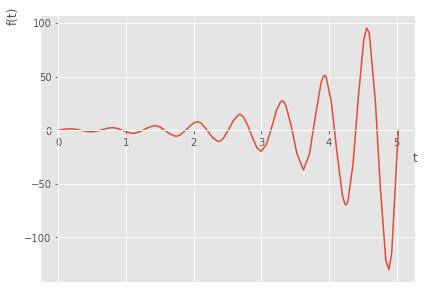

In [32]:
sy.plot(f, (t, 0, 8/5 * sy.pi))

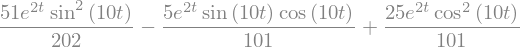

In [33]:
sy.integrate(f**2, t)

In [34]:
sy.sqrt(1/(8/5*sy.pi) * sy.integrate(f**2, (t, 0, 8/5*sy.pi))).evalf()